In [1]:
import matplotlib.pyplot as plt
from cartes.crs import Mercator
from cartes.osm import Overpass
from matplotlib.offsetbox import AnchoredText

D:\tdubot\anaconda3\envs\env2\lib\site-packages\cartes\osm\requests.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
airport = Overpass.request(area=dict(iata="iata"), aeroway=True)

D:\tdubot\anaconda3\envs\env2\lib\site-packages\shapely\geometry\polygon.py:539: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  ret = geos_linearring_from_py(shell)
D:\tdubot\anaconda3\envs\env2\lib\site-packages\shapely\geometry\polygon.py:539: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  ret = geos_linearring_from_py(shell)
D:\tdubot\anaconda3\envs\env2\lib\site-packages\shapely\geometry\polygon.py:539: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  ret = geos_linearring_from_py(shell)
D:\tdubot\anac

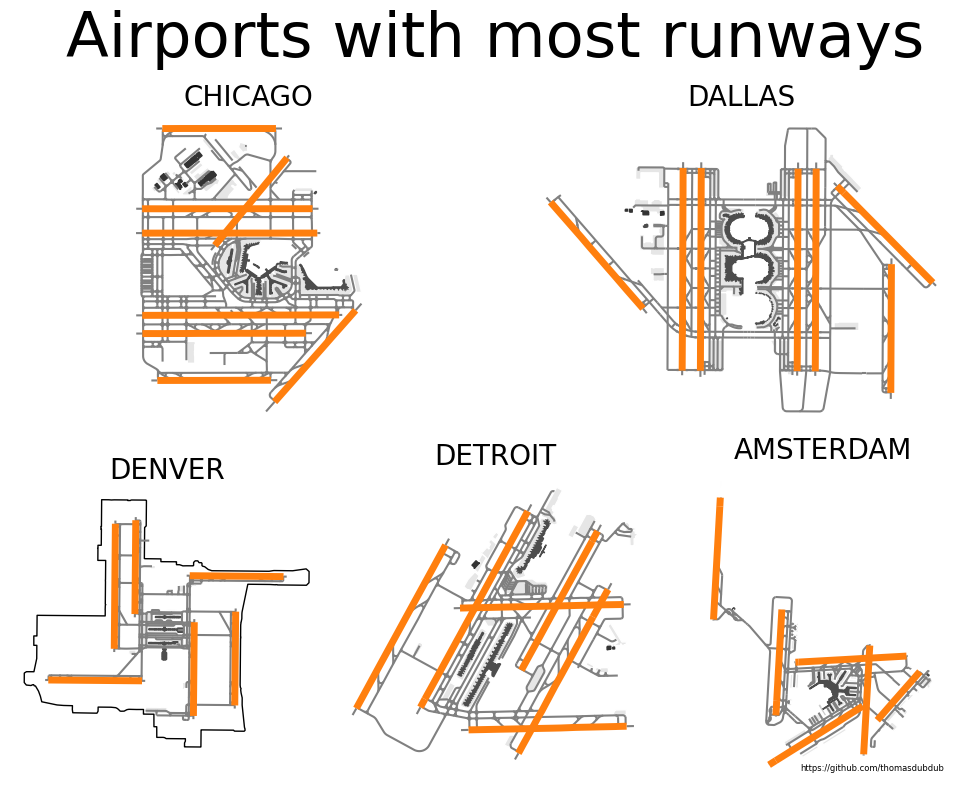

In [3]:
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot2grid((2, 6), (0, 0), colspan=3, projection=Mercator())
ax2 = plt.subplot2grid((2, 6), (0, 3), colspan=3, projection=Mercator())
ax3 = plt.subplot2grid((2, 6), (1, 0), colspan=2, projection=Mercator())
ax4 = plt.subplot2grid((2, 6), (1, 2), colspan=2, projection=Mercator())
ax5 = plt.subplot2grid((2, 6), (1, 4), colspan=2, projection=Mercator())
axs = [ax1, ax2, ax3, ax4, ax5]

iatas = ["ORD","DFW","DEN","DTW","AMS"]
iata_name = {"ORD":"CHICAGO", "DFW":"DALLAS","DEN":"DENVER","DTW":"DETROIT","AMS":"AMSTERDAM"}

for ax_, iata in zip(axs, iatas):
    airport = Overpass.request(area=dict(iata=iata), aeroway=True)
    airport.plot(
        ax_,
        by="aeroway",
        gate=dict(alpha=0), 
        runway=dict(color="tab:orange"),
        parking_position=dict(alpha=0),
        tower=dict(markersize=500),
        jet_bridge=dict(color="0.3"), 
        navigationaid=dict(papi=dict(alpha=0)),
    )
    ax_.spines["geo"].set_visible(False)
      
for ax, iata in zip(axs, iatas):
    ax.set_title(iata_name[iata], size=20, fontname="Fira Sans")
    
plt.suptitle("Airports with most runways", fontsize=45, color="k") 
plt.title(
    "https://github.com/thomasdubdub",
    fontsize=6,
    color="black",
    alpha=1.0,
    y=0.00,
    loc="right",
)
plt.tight_layout()
plt.savefig("airports.png", dpi=300, bbox_inches="tight", pad_inches=0)